In [2]:
# Let's first load the dataset to understand its structure and contents.
import pandas as pd

# Load the dataset
file_path = '../data/Bay Area/Water Level - San Francisco.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and its column information
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11640 entries, 0 to 11639
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            11640 non-null  object 
 1   Time (GMT)      11640 non-null  object 
 2   Predicted (ft)  11640 non-null  float64
 3   Verified (ft)   11640 non-null  float64
dtypes: float64(2), object(2)
memory usage: 363.9+ KB


(       Date Time (GMT)  Predicted (ft)  Verified (ft)
 0  1/1/2023       0:00           2.111           2.92
 1  1/1/2023       1:00           2.828           3.61
 2  1/1/2023       2:00           3.463           4.19
 3  1/1/2023       3:00           3.833           4.57
 4  1/1/2023       4:00           3.829           4.53,
 None)

In [3]:
import matplotlib.pyplot as plt

# Combine date and time into a single datetime column and set it as index
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time (GMT)'])
data.set_index('DateTime', inplace=True)

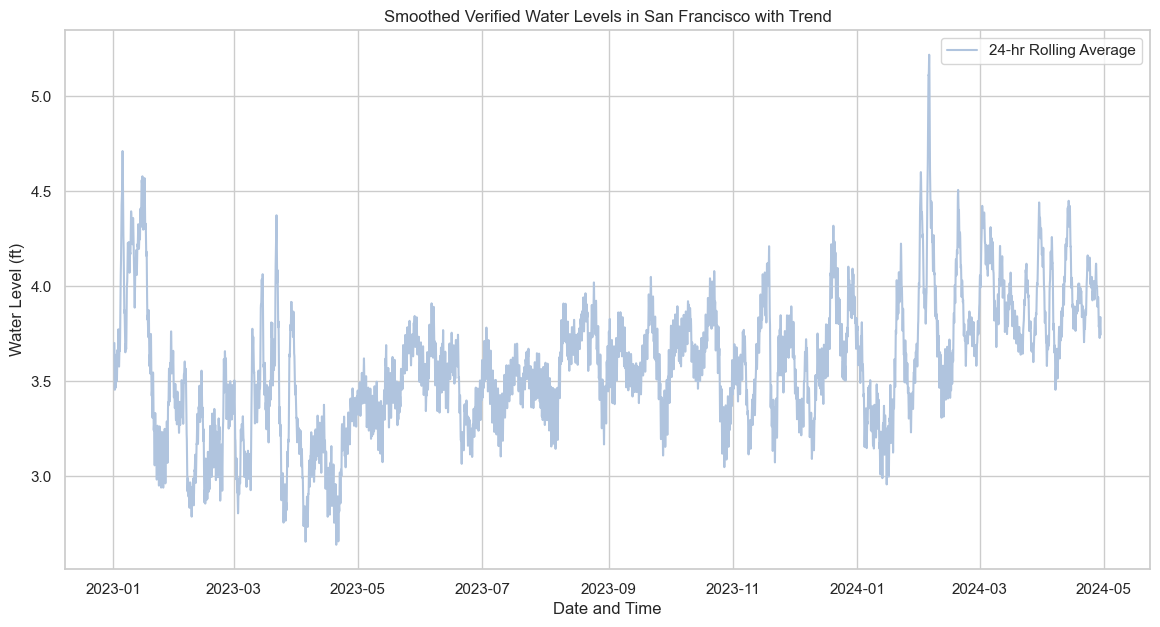

In [4]:
import seaborn as sns

# Setting seaborn style for better aesthetics
sns.set(style="whitegrid")

# Calculating a 24-hour rolling average to smooth the data
data['Verified Rolling'] = data['Verified (ft)'].rolling(window=24, center=True).mean()

# Plotting the smoothed verified water levels with trend
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x=data.index, y='Verified Rolling', label='24-hr Rolling Average', color='lightsteelblue')
plt.title('Smoothed Verified Water Levels in San Francisco with Trend')
plt.xlabel('Date and Time')
plt.ylabel('Water Level (ft)')
plt.legend()
plt.show()
